In [1]:
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import json

/home/liaom/sc/cdm_envs/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Retrive POIs in D.C.

In [2]:
# read census tract boundary in DC
dc_census_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_11_tract.zip")

In [3]:
print(dc_census_tract.total_bounds)

[-77.119759  38.791645 -76.909393  38.995845]


In [4]:
# Define the bboxing of Washington, D.C.
dc_bbox = "38.791645,-77.119759,38.995845,-76.909393 "

## Health Care 

In [5]:
# Define the Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# Define the Overpass query using the bounding box variable
dc_health_overpass_query = f"""
[out:json][timeout:25];

(
  node["amenity"="hospital"]({dc_bbox});
  node["amenity"="clinic"]({dc_bbox});
  node["amenity"="pharmacy"]({dc_bbox});
  node["amenity"="health_centre"]({dc_bbox});
  node["healthcare"="doctor"]({dc_bbox});
  node["healthcare"="dentist"]({dc_bbox});
  node["healthcare"="psychotherapist"]({dc_bbox});
  node["healthcare"="physiotherapist"]({dc_bbox});
  node["healthcare"="alternative"]({dc_bbox});

);
out body;
>;
out skel qt;
"""

# Make the request
dc_health_response = requests.get(overpass_url, params={'data': dc_health_overpass_query})
dc_health_dict = dc_health_response.json()

# Convert the data into a pandas DataFrame
dc_health_list = [] # Create a list for the initilization of the dataframe
for element in dc_health_dict['elements']:
    latitude = element['lat']
    longitude = element['lon']
    name = element.get('tags', {}).get('name', 'n/a')
    dc_health_list.append({
        'Name': name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Create the DataFrame using the list
dc_health_df = pd.DataFrame(dc_health_list)

# Show the DataFrame
dc_health_df

,Name,Latitude,Longitude
0,Arlington Free Clinic,38.882450,-77.105439
1,Mule Hospital,38.903445,-77.059422
2,Psychiatric Institute of Washington,38.943947,-77.077905
3,Betty Ford Comprehensive Center,38.905389,-77.051922
4,Center for Sickle Cell Disease,38.918522,-77.022152
...,...,...,...
317,CVS Pharmacy,38.992628,-76.932590
318,Restore Wellness,38.865036,-77.062781
319,Pivot,38.898454,-77.026388
320,Smile Center,38.927334,-77.032697


## Schools

In [6]:
# Define the Overpass query using the bounding box variable
dc_school_overpass_query = f"""
[out:json][timeout:25];

(
  node["amenity"="school"]({dc_bbox});
  node["amenity"="kindergarten"]({dc_bbox});
  node["amenity"="university"]({dc_bbox});
  node["amenity"="college"]({dc_bbox});
  
);
out body;
>;
out skel qt;
"""

# Make the request
dc_school_response = requests.get(overpass_url, params={'data': dc_school_overpass_query})
dc_school_dict = dc_school_response.json()

# Convert the data into a pandas DataFrame
dc_school_list = [] # Create a list for the initilization of the dataframe
for element in dc_school_dict['elements']:
    latitude = element['lat']
    longitude = element['lon']
    name = element.get('tags', {}).get('name', 'n/a')
    dc_school_list.append({
        'Name': name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Create the DataFrame using the list
dc_school_df = pd.DataFrame(dc_school_list)

# Show the DataFrame
dc_school_df

,Name,Latitude,Longitude
0,Barcroft Elementary School,38.861670,-77.107840
1,Saint Thomas More Cathedral School,38.871223,-77.104399
2,Houston School,38.812613,-77.048033
3,Immanuel Lutheran School,38.821999,-77.065117
4,Minnie Howard School,38.828177,-77.095183
...,...,...,...
527,Merit School of Clarendon,38.891457,-77.086936
528,Bethesda Cooperative Nursery School,38.987530,-77.100406
529,Guidepost Montessori,38.841273,-77.108038
530,Zartman House,38.939383,-77.073996


## Eateries

In [7]:
# Define the Overpass query using the bounding box variable
dc_eatery_overpass_query = f"""
[out:json][timeout:25];

(
  node["amenity"="restaurant"]({dc_bbox});
  node["amenity"="cafe"]({dc_bbox});
  node["amenity"="bar"]({dc_bbox});
  node["amenity"="biergarten"]({dc_bbox});
  node["amenity"="pub"]({dc_bbox});
  
);
out body;
>;
out skel qt;
"""

# Make the request
dc_eatery_response = requests.get(overpass_url, params={'data': dc_eatery_overpass_query})
dc_eatery_dict = dc_eatery_response.json()

# Convert the data into a pandas DataFrame
dc_eatery_list = [] # Create a list for the initilization of the dataframe
for element in dc_eatery_dict['elements']:
    latitude = element['lat']
    longitude = element['lon']
    name = element.get('tags', {}).get('name', 'n/a')
    dc_eatery_list.append({
        'Name': name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Create the DataFrame using the list
dc_eatery_df = pd.DataFrame(dc_eatery_list)

# Show the DataFrame
dc_eatery_df

,Name,Latitude,Longitude
0,Cafe Saint Ex,38.915421,-77.031701
1,Millie’s,38.945050,-77.096330
2,Buzz Bakeshop,38.821596,-77.047646
3,Euro Market,38.891441,-77.086067
4,Mamma Lucia,38.990991,-77.029690
...,...,...,...
2290,Café Con Bagel,38.907573,-77.063560
2291,Donahue DC,38.907631,-77.063620
2292,Georgetown Seafood,38.905525,-77.065083
2293,Gong Cha,38.905273,-77.065405


## Parks

In [8]:
# Define the Overpass query using the bounding box variable
dc_park_overpass_query = f"""
[out:json][timeout:25];

(
  node["amenity"="park"]({dc_bbox});
  node["leisure"=park]({dc_bbox});
  //node["amenity"="mall"]({dc_bbox});
  //node["amenity"="bar"]({dc_bbox});
  
);
out body;
>;
out skel qt;
"""

# Make the request
dc_park_response = requests.get(overpass_url, params={'data': dc_park_overpass_query})
dc_park_dict = dc_park_response.json()

# Convert the data into a pandas DataFrame
dc_park_list = [] # Crparke a list for the initilization of the dataframe
for element in dc_park_dict['elements']:
    latitude = element['lat']
    longitude = element['lon']
    name = element.get('tags', {}).get('name', 'n/a')
    dc_park_list.append({
        'Name': name,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Crparke the DataFrame using the list
dc_park_df = pd.DataFrame(dc_park_list)

# Show the DataFrame
dc_park_df

,Name,Latitude,Longitude
0,George Washington Memorial Parkway,38.836669,-77.045558
1,Little Falls Park,38.970944,-77.100256
2,Brooks Road Recreation Center,38.875112,-76.914418
3,North Englewood Playground,38.912402,-76.918023
4,Mount Rainier Neighborhood Park,38.947889,-76.964975
...,...,...,...
62,Leonardtown Park,38.983402,-76.932809
63,n/a,38.925880,-76.991668
64,The Fields at RFK Campus Pavillion,38.893023,-76.970651
65,The Grove,38.877195,-77.022498


# Aggregate POIs into each census tract in D.C.
* https://octo.dc.gov/page/coordinate-system-standards

In [9]:
# read census tract boundary in DC
dc_census_tract_rprj = dc_census_tract.to_crs("EPSG:26986")

## Health Care

In [10]:
# Create a GeoDataFrame for `dc_health_df`
dc_health_gdf = gpd.GeoDataFrame(dc_health_df.copy(), geometry=gpd.points_from_xy(dc_health_df.Longitude, dc_health_df.Latitude), crs = dc_census_tract.crs) #"EPSG:4326"

# Reproject the `dc_health_gdf` to match the CRS of the `dc_census_tract_rprj` GeoDataFrame
dc_health_gdf_prj = dc_health_gdf.to_crs(dc_census_tract_rprj.crs)

# Perform a spatial join between the reprojected health points and the census tracts.
# This assigns each health to a census tract if it is within the tract's boundaries.
dc_health = gpd.sjoin(dc_health_gdf_prj, dc_census_tract_rprj, predicate='within', how='inner').reset_index(drop = True)
dc_ct_health = dc_health.assign(count = np.ones(dc_health.shape[0]))
dc_ct_health = dc_ct_health.groupby('GEOID')['count'].sum().reset_index()

# Merge the health counts with the census tracts GeoDataFrame
dc_ct_pois = dc_census_tract.merge(dc_ct_health, on='GEOID', how='left')

# Replace NaN values with 0 for tracts without health
dc_ct_pois['count'] = dc_ct_pois['count'].fillna(0)

# Rename the 'count' column to 'health_count'
dc_ct_pois.rename(columns={'count': 'health_count'}, inplace=True)

## Schools

In [11]:
# Create a GeoDataFrame for `dc_school_df`
dc_school_gdf = gpd.GeoDataFrame(dc_school_df.copy(), geometry=gpd.points_from_xy(dc_school_df.Longitude, dc_school_df.Latitude), crs = dc_census_tract.crs) #"EPSG:4326"

# Reproject the `dc_school_gdf` to match the CRS of the `dc_census_tract_rprj` GeoDataFrame
dc_school_gdf_prj = dc_school_gdf.to_crs(dc_census_tract_rprj.crs)

# Perform a spatial join between the reprojected school points and the census tracts.
# This assigns each school to a census tract if it is within the tract's boundaries.
dc_school = gpd.sjoin(dc_school_gdf_prj, dc_census_tract_rprj, predicate='within', how='inner').reset_index(drop = True)
dc_ct_school = dc_school.assign(count = np.ones(dc_school.shape[0]))
dc_ct_school = dc_ct_school.groupby('GEOID')['count'].sum().reset_index()

# Merge the school counts with the census tracts GeoDataFrame
dc_ct_pois = dc_census_tract.merge(dc_ct_school, on='GEOID', how='left')

# Replace NaN values with 0 for tracts without school
dc_ct_pois['count'] = dc_ct_pois['count'].fillna(0)

# Rename the 'count' column to 'school_count'
dc_ct_pois.rename(columns={'count': 'school_count'}, inplace=True)

## Eateries

In [12]:
# Create a GeoDataFrame for `dc_eatery_df`
dc_eatery_gdf = gpd.GeoDataFrame(dc_eatery_df.copy(), geometry=gpd.points_from_xy(dc_eatery_df.Longitude, dc_eatery_df.Latitude), crs = dc_census_tract.crs) #"EPSG:4326"

# Reproject the `dc_eatery_gdf` to match the CRS of the `dc_census_tract_rprj` GeoDataFrame
dc_eatery_gdf_prj = dc_eatery_gdf.to_crs(dc_census_tract_rprj.crs)

# Perform a spatial join between the reprojected eatery points and the census tracts.
# This assigns each eatery to a census tract if it is within the tract's boundaries.
dc_eatery = gpd.sjoin(dc_eatery_gdf_prj, dc_census_tract_rprj, predicate='within', how='inner').reset_index(drop = True)
dc_ct_eatery = dc_eatery.assign(count = np.ones(dc_eatery.shape[0]))
dc_ct_eatery = dc_ct_eatery.groupby('GEOID')['count'].sum().reset_index()

# Merge the eatery counts with the census tracts GeoDataFrame
dc_ct_pois = dc_census_tract.merge(dc_ct_eatery, on='GEOID', how='left')

# Replace NaN values with 0 for tracts without eatery
dc_ct_pois['count'] = dc_ct_pois['count'].fillna(0)

# Rename the 'count' column to 'eatery_count'
dc_ct_pois.rename(columns={'count': 'eatery_count'}, inplace=True)

## Parks

In [13]:
# Create a GeoDataFrame for `dc_park_df`
dc_park_gdf = gpd.GeoDataFrame(dc_park_df.copy(), geometry=gpd.points_from_xy(dc_park_df.Longitude, dc_park_df.Latitude), crs = dc_census_tract.crs) #"EPSG:4326"

# Reproject the `dc_park_gdf` to match the CRS of the `dc_census_tract_rprj` GeoDataFrame
dc_park_gdf_prj = dc_park_gdf.to_crs(dc_census_tract_rprj.crs)

# Perform a spatial join between the reprojected park points and the census tracts.
# This assigns each park to a census tract if it is within the tract's boundaries.
dc_park = gpd.sjoin(dc_park_gdf_prj, dc_census_tract_rprj, predicate='within', how='inner').reset_index(drop = True)
dc_ct_park = dc_park.assign(count = np.ones(dc_park.shape[0]))
dc_ct_park = dc_ct_park.groupby('GEOID')['count'].sum().reset_index()

# Merge the park counts with the census tracts GeoDataFrame
dc_ct_pois = dc_census_tract.merge(dc_ct_park, on='GEOID', how='left')

# Replace NaN values with 0 for tracts without park
dc_ct_pois['count'] = dc_ct_pois['count'].fillna(0)

# Rename the 'count' column to 'park_count'
dc_ct_pois.rename(columns={'count': 'park_count'}, inplace=True)

In [14]:
dc_ct_pois

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,park_count
0,11,001,004001,11001004001,40.01,Census Tract 40.01,G5020,S,271037,2414,+38.9208738,-077.0462674,"POLYGON ((-77.05018 38.92124, -77.05006 38.921...",0.0
1,11,001,004002,11001004002,40.02,Census Tract 40.02,G5020,S,194755,0,+38.9181186,-077.0437209,"POLYGON ((-77.04630 38.91631, -77.04630 38.916...",0.0
2,11,001,003600,11001003600,36,Census Tract 36,G5020,S,305616,0,+38.9236744,-077.0296273,"POLYGON ((-77.03241 38.92657, -77.03217 38.926...",0.0
3,11,001,004201,11001004201,42.01,Census Tract 42.01,G5020,S,204529,0,+38.9162076,-077.0388456,"POLYGON ((-77.04166 38.91418, -77.04166 38.914...",0.0
4,11,001,004202,11001004202,42.02,Census Tract 42.02,G5020,S,207646,0,+38.9134023,-077.0430254,"POLYGON ((-77.04599 38.91450, -77.04574 38.914...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,11,001,009801,11001009801,98.01,Census Tract 98.01,G5020,S,431384,7884,+38.8328939,-076.9963306,"POLYGON ((-77.00386 38.83099, -77.00353 38.831...",0.0
202,11,001,002801,11001002801,28.01,Census Tract 28.01,G5020,S,171910,0,+38.9349477,-077.0345166,"POLYGON ((-77.03645 38.93412, -77.03645 38.934...",0.0
203,11,001,002802,11001002802,28.02,Census Tract 28.02,G5020,S,229696,0,+38.9294344,-077.0346327,"POLYGON ((-77.03671 38.92712, -77.03648 38.927...",0.0
204,11,001,008001,11001008001,80.01,Census Tract 80.01,G5020,S,322795,0,+38.8961726,-076.9866524,"POLYGON ((-76.99025 38.89731, -76.98830 38.898...",0.0


# Visulization

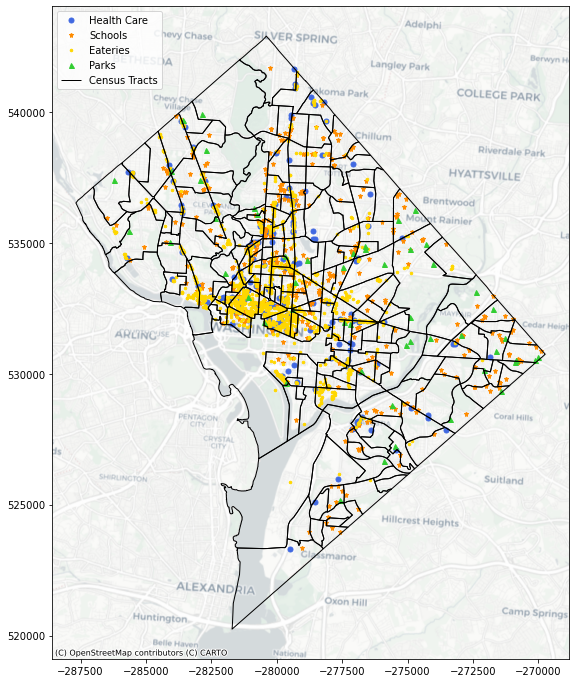

In [15]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import contextily as ctx
fig, ax = plt.subplots(figsize=(12,12))

ax.plot(dc_health.geometry.x, dc_health.geometry.y, 'o', markersize=5, color='royalblue', label='Health Care')
ax.plot(dc_school.geometry.x, dc_school.geometry.y, '*', markersize=5, color='darkorange', label='Schools')
ax.plot(dc_eatery.geometry.x, dc_eatery.geometry.y, '.', markersize=5, color='gold', label='Eateries')
ax.plot(dc_park.geometry.x, dc_park.geometry.y, '^', markersize=5, color='limegreen', label='Parks')

dc_census_tract_rprj.boundary.plot(ax=ax, color='black', linewidth=1, label='Census Tracts') 

ctx.add_basemap(ax, crs=dc_census_tract_rprj.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add elements to legend.
ax.legend(loc='upper left')

plt.show()